In [137]:
import matplotlib.pyplot as plt
import numpy as np



### 1.1 Comprendre le modèle mathématique

Le modèle Lorenz-96 à deux échelles est constitué de deux ensembles d’équations différentielles couplées :

#### 1. Grande échelle \( (X_k) \)

L'équation pour les grandes échelles est donnée par :

$$
\frac{dX_k}{dt} = -X_{k-1}(X_{k-2} - X_{k+1}) - X_k + F - \frac{hc}{b} \sum_{j=1}^J Y_{j,k}
$$

- \( X_k \) représente les grandes échelles globales (par exemple, température moyenne).
- \( F \) est un forçage externe.
- Le terme $$ -\frac{hc}{b} \sum_{j=1}^J Y_{j,k} $$ représente l’influence des petites échelles \( Y_{j,k} \).

#### 2. Petite échelle ($$ \ Y_{j,k} \ $$ )

L'équation pour les petites échelles est donnée par :

$$
\frac{dY_{j,k}}{dt} = -cb Y_{j+1,k}(Y_{j+2,k} - Y_{j-1,k}) - cY_{j,k} + \frac{hc}{b} X_k
$$

- \( Y_{j,k} \) représente des fluctuations locales à petite échelle.
- \( h \), \( c \), et \( b \) sont des paramètres de couplage et de dynamique interne.

### Objectif

- Se familiariser avec les équations différentielles du modèle Lorenz-96 à deux échelles : \( (X_k) \) pour les grandes échelles et \( (Y_{j,k}) \) pour les petites échelles.
- Comprendre le rôle des paramètres \( (F, h, b, c) \) dans la dynamique du système.

### À étudier

- Définir les équations couplées pour \( (X_k) \) et \( (Y_{j,k}) \).
- Expliquer les interactions entre grandes et petites échelles (le couplage via les termes \( (h) \), \( (b) \), \( (c) \)).

#### **1.2 Implémenter le modèle en Python**

- **Objectif :**
  - Traiter les équations différentielles en code.
  - Simuler la dynamique du système en utilisant une méthode d’intégration temporelle (comme Runge-Kutta d’ordre 4).
  
- **Remarque :**
  - Écrire une fonction pour calculer les dérivées et implémenter les trajectoires \(X_k\) et \(Y_{j,k}\).




1. **Calcul des dérivées temporelles :**
   Le code suivant calcule les dérivées temporelles pour \(X_k\) et \(Y_{j,k}\) :


In [138]:
import numpy as np
import matplotlib.pyplot as plt



# Fonction calculant les dérivées temporelles de X et Y
def L96_2t_xdot_ydot(X, Y, F, h, b, c):
    """
    Calcule les dérivées temporelles pour les grandes échelles (X) et petites échelles (Y).
    """
    K = len(X)
    J = len(Y) // K
    Y = Y.reshape(J, K)

    hcb = (h * c) / b
    Ysummed = Y.sum(axis=0)

    # Dynamique des grandes échelles
    Xdot = np.roll(X, 1) * (np.roll(X, -1) - np.roll(X, 2)) - X + F - hcb * Ysummed

    # Dynamique des petites échelles
    Ydot = (
        -c * b * np.roll(Y, -1, axis=0) * (np.roll(Y, -2, axis=0) - np.roll(Y, 1, axis=0))
        - c * Y
        + hcb * X
    ).ravel()

    return Xdot, Ydot





2. **Intégration temporelle avec Runge-Kutta (RK4) :**
   Le modèle est intégré dans le temps avec une précision d’ordre 4 grâce à la méthode RK4 :
  


In [139]:
# Fonction pour intégrer le modèle avec la méthode Runge-Kutta (RK4)
def integrate_L96_2t(X0, Y0, si, nt, F, h, b, c, dt=0.005):
    """
    Intègre le modèle Lorenz-96 à deux échelles dans le temps en utilisant RK4.

    Args:
        X0, Y0 : Conditions initiales pour X et Y
        si : Intervalle d'échantillonnage
        nt : Nombre de points d'échantillonnage
        F, h, b, c : Paramètres du modèle
        dt : Pas de temps pour l'intégration

    Returns:
        xhist, yhist, time : Trajectoires de X et Y, et le vecteur temps
    """
    JK, K = len(Y0), len(X0)
    J = JK // K

    xhist, yhist, time = [X0], [Y0], [0]

    for _ in range(nt):
        X, Y = xhist[-1], yhist[-1]

        # RK4 Step 1
        Xdot, Ydot = L96_2t_xdot_ydot(X, Y, F, h, b, c)
        k1x, k1y = Xdot * dt, Ydot * dt

        # RK4 Step 2
        Xdot, Ydot = L96_2t_xdot_ydot(X + 0.5 * k1x, Y + 0.5 * k1y, F, h, b, c)
        k2x, k2y = Xdot * dt, Ydot * dt

        # RK4 Step 3
        Xdot, Ydot = L96_2t_xdot_ydot(X + 0.5 * k2x, Y + 0.5 * k2y, F, h, b, c)
        k3x, k3y = Xdot * dt, Ydot * dt

        # RK4 Step 4
        Xdot, Ydot = L96_2t_xdot_ydot(X + k3x, Y + k3y, F, h, b, c)
        k4x, k4y = Xdot * dt, Ydot * dt

        # Update values
        X_next = X + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
        Y_next = Y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

        xhist.append(X_next)
        yhist.append(Y_next)
        time.append(time[-1] + dt)

    return np.array(xhist), np.array(yhist), np.array(time)



### **Étape 2 : Générer des données synthétiques**

#### **2.1 Initialisation des conditions**

1. **Initialisation flexible :**
   Le choix des conditions initiales est important pour explorer différentes dynamiques :

- **Objectif :**
  - Définir les conditions initiales \(X_0\) du système.
  
- **Activité :**
  - Implémenter une fonction flexible pour générer \(X_0\) et \(Y_0\).

In [140]:

# Fonction pour calculer les coordonnées normalisées
def s(k, K):
    """Coordonnées normalisées de -1 à 1 pour k = 0...K."""
    return 2 * (0.5 + k) / K - 1

# Fonction d'initialisation flexible
def initialize_conditions(K, J, init_type="structured"):
    """
    Initialise les conditions initiales pour X et Y avec différentes stratégies.

    Args:
        K : Nombre de grandes échelles (X_k)
        J : Nombre de petites échelles par grande échelle
        init_type : Type d'initialisation ("structured", "random", "sinusoidal")

    Returns:
        X_init, Y_init : Conditions initiales pour X et Y
    """
    k = np.arange(K)
    j = np.arange(J * K)
    
    if init_type == "structured":
        X_init = s(k, K) * (s(k, K) - 1) * (s(k, K) + 1)
        Y_init = 0 * s(j, J * K)
    elif init_type == "random":
        X_init = np.random.normal(0, 1, K)
        Y_init = np.random.normal(0, 1, J * K)
    elif init_type == "sinusoidal":
        X_init = np.sin(2 * np.pi * k / K)
        Y_init = np.sin(2 * np.pi * j / (J * K))
    else:
        raise ValueError("init_type non reconnu. Choisir 'structured', 'random', ou 'sinusoidal'.")

    return X_init, Y_init


#### **2.2 Simulation du modèle Lorenz-96**

Simule les trajectoires idéales (\(X_k\) et \(Y_{j,k}\)) :
- **Objectif :**
  - Simuler les données "ground truth" en utilisant les valeurs des paramètres \((F, h, b, c)\).
  
- **Activité :**
  - Utiliser ces données comme référence pour les comparaisons futures.





1. **Paramètres initiaux :**

In [141]:
# Paramètres "ground truth" pour les simulations
F_true, h_true, c_true, b_true = 10, 1, 10, 10
K, J = 36, 10
nt, si, dt = 1000, 0.005, 0.005
# Initialisation des conditions
X_init, Y_init = initialize_conditions(K, J, init_type="structured")




2. **Simulation :**

In [142]:
# Simulation avec les paramètres "ground truth"
X, Y, t = integrate_L96_2t(X_init, Y_init, si, nt, F_true, h_true, c_true, b_true, dt=dt)



3. **Visualisation des trajectoires**

Les trajectoires des grandes échelles (\(X_k(t)\)) et des petites échelles (\(Y_{j,k}(t)\)) 

In [143]:
import matplotlib.pyplot as plt

def visualize_trajectories(X, Y, t, K, J):
    """
    Visualise les trajectoires des grandes échelles (X_k) et des petites échelles (Y_{j,k}).

    Args:
        X : Trajectoire des grandes échelles
        Y : Trajectoire des petites échelles
        t : Vecteur temps
        K : Nombre de grandes échelles
        J : Nombre de petites échelles par grande échelle
    """
    plt.figure(figsize=(12, 8))

    # Visualisation d'une grande échelle X_k
    plt.subplot(2, 1, 1)
    plt.plot(t, X[:, 0], label="X_0 (Grande échelle)")
    plt.plot(t, X[:, 1], label="X_1 (Grande échelle)")
    plt.xlabel("Temps")
    plt.ylabel("X_k")
    plt.title("Trajectoires des grandes échelles (X_k)")
    plt.legend()
    plt.grid()

    # Visualisation d'une petite échelle Y_{j,k}
    plt.subplot(2, 1, 2)
    plt.plot(t, Y[:, 0], label="Y_{0,0} (Petite échelle)")
    plt.plot(t, Y[:, J], label="Y_{0,1} (Petite échelle)")
    plt.xlabel("Temps")
    plt.ylabel("Y_{j,k}")
    plt.title("Trajectoires des petites échelles (Y_{j,k})")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

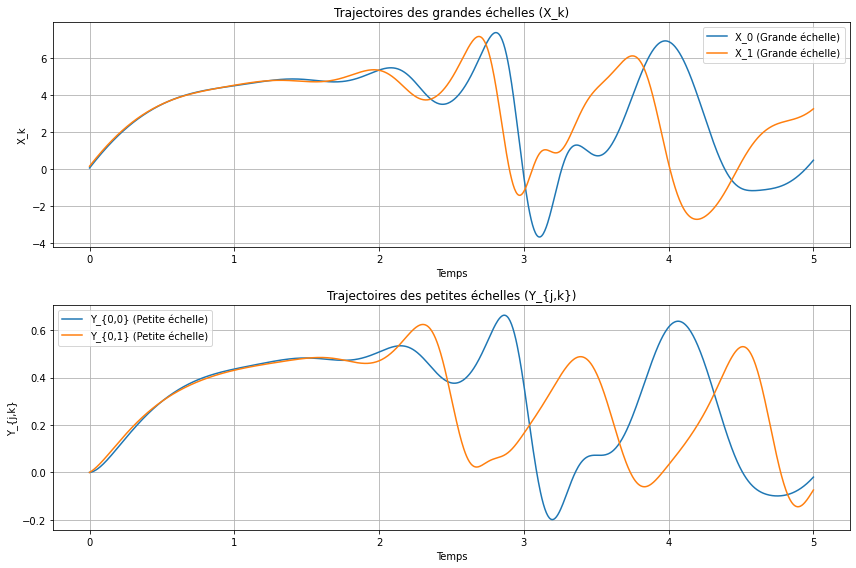

In [144]:
visualize_trajectories(X, Y, t, K=36, J=10)

**Analyse des résultats :**
- Vérifiez que les trajectoires \(X_k(t)\) et \(Y_{j,k}(t)\) montrent des oscillations irrégulières.
- Comparez vos résultats avec des références (articles sur Lorenz-96).


**4. Stabilité numérique**

**Tests de stabilité :**
1. Vérifiez que les trajectoires ne divergent pas pour les paramètres choisis (\(F, h, b, c\)).
2. Si des instabilités apparaissent :
   - Diminuez le pas de temps (\(dt\)).
   - Ajustez les plages des paramètres (\(F, h, b, c\)).


In [145]:

def check_stability(X, Y, t):
    """
    Vérifie la stabilité des trajectoires (pas d'explosion numérique).

    Args:
        X : Trajectoire des grandes échelles
        Y : Trajectoire des petites échelles
        t : Vecteur temps

    Returns:
        stable : Booléen indiquant si le système est stable
    """
    # Vérifier si les valeurs restent dans une plage raisonnable
    max_X, max_Y = np.max(np.abs(X)), np.max(np.abs(Y))
    if max_X > 1e3 or max_Y > 1e3:
        print("Instabilité détectée : valeurs trop grandes.")
        return False
    if np.isnan(X).any() or np.isnan(Y).any():
        print("Instabilité détectée : NaN dans les trajectoires.")
        return False
    return True



In [146]:
stable = check_stability(X, Y, t)
if stable:
    print("Le modèle est stable pour les paramètres actuels.")
else:
    print("Le modèle est instable. Ajustez dt ou les paramètres.")

Le modèle est stable pour les paramètres actuels.


In [185]:
import plotly.graph_objects as go

def calculate_and_visualize_derivatives(X, Y, F, h, b, c):
    """
    Calcule et visualise les dérivées temporelles pour les grandes et petites échelles
    sur deux graphiques distincts avec Plotly.

    Args:
        X : Trajectoire des grandes échelles
        Y : Trajectoire des petites échelles
        F, h, b, c : Paramètres du modèle
    """
    # Calcul des dérivées temporelles
    X_dot, Y_dot = L96_2t_xdot_ydot(X[-1], Y[-1], F, h, b, c)  # Dérivées pour le dernier état

    # Premier graphique : Dérivées des grandes échelles
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(
        x=list(range(len(X_dot))),
        y=X_dot,
        mode='lines',
        name="dX_k/dt",
        line=dict(color='blue')
    ))
    fig1.update_layout(
        title="Dérivées temporelles des grandes échelles (dX_k/dt)",
        xaxis_title="Indice k",
        yaxis_title="dX_k/dt",
        template="plotly_white"
    )
    fig1.show()

    # Deuxième graphique : Dérivées des petites échelles
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(
        x=list(range(len(Y_dot))),
        y=Y_dot,
        mode='lines',
        name="dY_{j,k}/dt",
        line=dict(color='orange')
    ))
    fig2.update_layout(
        title="Dérivées temporelles des petites échelles (dY_{j,k}/dt)",
        xaxis_title="Indice j,k",
        yaxis_title="dY_{j,k}/dt",
        template="plotly_white"
    )
    fig2.show()


In [186]:
# Calcul et visualisation des dérivées pour une configuration donnée

F, h, b, c = 10.0, 1.0, 10.0, 10.0  # Paramètres du modèle


# Visualisation des dérivées
calculate_and_visualize_derivatives_plotly_separate(X, Y, F, h, b, c)


**Étude de l'impact des paramètres sur les dérivées**

Vous pouvez tester différentes valeurs de \(F, h, b, c\) et observer leur effet sur les dérivées temporelles (\(dX_k/dt\) et \(dY_{j,k}/dt\)).




In [152]:
def test_derivative_influence(F_values, h_values, b_values, c_values):
    """
    Teste l'influence des paramètres sur les dérivées temporelles et les visualise avec Plotly.

    Args:
        F_values, h_values, b_values, c_values : Listes de valeurs à tester
    """
    for F in F_values:
        for h in h_values:
            for b in b_values:
                for c in c_values:
                    print(f"Test avec F = {F}, h = {h}, b = {b}, c = {c}")
                    # Simulation des trajectoires pour les paramètres actuels
                    X, Y, t = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt)
                    # Visualisation des dérivées avec Plotly
                    calculate_and_visualize_derivatives(X, Y, F, h, b, c)


In [153]:
F_values = [8.0, 10.0]  # Différents forçages
h_values = [0.5, 1.0]    # Différents couplages
b_values = [8.0, 10.0]  # Amplitudes locales
c_values = [8.0, 10.0]  # Échelles temporelles

test_derivative_influence(F_values, h_values, b_values, c_values)


Test avec F = 8.0, h = 0.5, b = 8.0, c = 8.0


Test avec F = 8.0, h = 0.5, b = 8.0, c = 10.0


Test avec F = 8.0, h = 0.5, b = 10.0, c = 8.0


Test avec F = 8.0, h = 0.5, b = 10.0, c = 10.0


Test avec F = 8.0, h = 1.0, b = 8.0, c = 8.0


Test avec F = 8.0, h = 1.0, b = 8.0, c = 10.0


Test avec F = 8.0, h = 1.0, b = 10.0, c = 8.0


Test avec F = 8.0, h = 1.0, b = 10.0, c = 10.0


Test avec F = 10.0, h = 0.5, b = 8.0, c = 8.0


Test avec F = 10.0, h = 0.5, b = 8.0, c = 10.0


Test avec F = 10.0, h = 0.5, b = 10.0, c = 8.0


Test avec F = 10.0, h = 0.5, b = 10.0, c = 10.0


Test avec F = 10.0, h = 1.0, b = 8.0, c = 8.0


Test avec F = 10.0, h = 1.0, b = 8.0, c = 10.0


Test avec F = 10.0, h = 1.0, b = 10.0, c = 8.0


Test avec F = 10.0, h = 1.0, b = 10.0, c = 10.0



#### **3. Analyse des résultats**

1. **Forçage (\(F\)) :**
   - Des valeurs plus élevées de \(F\) augmentent l'intensité des dérivées \(dX_k/dt\), rendant les grandes échelles plus dynamiques.
   - Cela peut se traduire par des oscillations plus chaotiques.

2. **Couplage (\(h\)) :**
   - Un \(h\) plus élevé intensifie l'impact des petites échelles (\(Y_{j,k}\)) sur les grandes échelles (\(X_k\)).
   - Des valeurs faibles de \(h\) peuvent réduire la contribution des petites échelles.

3. **Paramètres locaux (\(b, c\)) :**
   - Des valeurs élevées de \(b\) ou \(c\) augmentent l'intensité des dérivées \(dY_{j,k}/dt\), rendant les petites échelles plus dynamiques.

4. **Stabilité numérique :**
   - Vérifiez que les dérivées ne divergent pas (valeurs très grandes ou infinies).
   - Si des divergences apparaissent, ajustez \(dt\) ou réduisez les plages de paramètres.

### **Conclusion**

Utiliser les dérivées temporelles permet de :
1. **Analyser l’influence des paramètres :** Vous pouvez quantifier directement comment chaque paramètre (\(F, h, b, c\)) affecte les dynamiques des grandes et petites échelles.
2. **Détecter des comportements instables :** Des dérivées qui divergent signalent des problèmes dans les plages de paramètres ou les configurations numériques.
3. **Guider le choix des paramètres :** Identifiez les plages de paramètres qui produisent des dynamiques chaotiques réalistes.



#### **2.3 Ajouter du bruit**

Ajoute un bruit gaussien pour imiter des observations réelles :

- **Objectif :**
  - Simuler des observations à partir de données réelles.
  
- **Activité :**
  - Ajouter du bruit avec `np.random.normal()` et générer \(X_{\text{observé}}\).

In [154]:
# Ajout de bruit aux données simulées
np.random.seed(42)  # Pour assurer la reproductibilité
noise_level = 0.1
X_observed = X + np.random.normal(0, noise_level, X.shape)

### 2.4 Vérifier les données

- **Objectif :**
  - Vérifier que les données bruitées conservent des propriétés similaires aux données "ground truth".
  
- **Activité :**
  - Calculer des statistiques (moyenne, variance) pour comparer \(X_{\text{observé}}\) et \(X_{\text{ground truth}}\).

In [155]:
# Moyenne des trajectoires idéales (non bruitées)
mean_X = np.mean(X, axis=0)  # Moyenne par indice k (grandes échelles)
var_X = np.var(X, axis=0)    # Variance par indice k

# Moyenne des trajectoires bruitées
mean_X_observed = np.mean(X_observed, axis=0)
var_X_observed = np.var(X_observed, axis=0)

# Affichage des statistiques
print("Statistiques pour les données non bruitées (X) :")
print(f"Moyenne globale : {np.mean(mean_X):.3f}")
print(f"Variance globale : {np.mean(var_X):.3f}")

print("\nStatistiques pour les données bruitées (X_observed) :")
print(f"Moyenne globale : {np.mean(mean_X_observed):.3f}")
print(f"Variance globale : {np.mean(var_X_observed):.3f}")


Statistiques pour les données non bruitées (X) :
Moyenne globale : 3.188
Variance globale : 5.691

Statistiques pour les données bruitées (X_observed) :
Moyenne globale : 3.187
Variance globale : 5.705


#**Visualisation des données**

**Comparaison entre données idéales et bruitées :**


In [156]:
import plotly.graph_objects as go
import numpy as np

def visualize_synthetic(X_groundtruth, X_observed):
    """
    Visualise les trajectoires, moyennes et variances des données "ground truth" et bruitées.

    Args:
        X_groundtruth : Données "ground truth" (grandes échelles)
        X_observed : Données bruitées (grandes échelles)
    """
    # Calcul des moyennes et variances
    mean_X = np.mean(X_groundtruth, axis=0)
    var_X = np.var(X_groundtruth, axis=0)
    mean_X_observed = np.mean(X_observed, axis=0)
    var_X_observed = np.var(X_observed, axis=0)

    # Création des graphiques avec Plotly
    # 1. Trajectoire d'un seul indice k
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(
        x=list(range(len(X_groundtruth[:, 0]))),
        y=X_groundtruth[:, 0],
        mode='lines',
        name="X_groundtruth (X_0)",
        line=dict(color='blue')
    ))
    fig1.add_trace(go.Scatter(
        x=list(range(len(X_observed[:, 0]))),
        y=X_observed[:, 0],
        mode='lines',
        name="X_observed (X_0, bruité)",
        line=dict(color='orange', dash='dash')
    ))
    fig1.update_layout(
        title="Trajectoire d'une grande échelle (X_0)",
        xaxis_title="Temps",
        yaxis_title="Amplitude",
        template="plotly_white"
    )
    fig1.show()

    # 2. Moyenne par indice k
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(
        x=list(range(len(mean_X))),
        y=mean_X,
        mode='lines',
        name="Moyenne (X_groundtruth)",
        line=dict(color='blue')
    ))
    fig2.add_trace(go.Scatter(
        x=list(range(len(mean_X_observed))),
        y=mean_X_observed,
        mode='lines',
        name="Moyenne (X_observed)",
        line=dict(color='orange', dash='dash')
    ))
    fig2.update_layout(
        title="Moyenne par indice k",
        xaxis_title="Indice k",
        yaxis_title="Moyenne",
        template="plotly_white"
    )
    fig2.show()

    # 3. Variance par indice k
    fig3 = go.Figure()
    fig3.add_trace(go.Scatter(
        x=list(range(len(var_X))),
        y=var_X,
        mode='lines',
        name="Variance (X_groundtruth)",
        line=dict(color='blue')
    ))
    fig3.add_trace(go.Scatter(
        x=list(range(len(var_X_observed))),
        y=var_X_observed,
        mode='lines',
        name="Variance (X_observed)",
        line=dict(color='orange', dash='dash')
    ))
    fig3.update_layout(
        title="Variance par indice k",
        xaxis_title="Indice k",
        yaxis_title="Variance",
        template="plotly_white"
    )
    fig3.show()


In [157]:
# Visualisation
visualize_synthetic(X, X_observed)

3. Analyse des résultats
Interprète les écarts entre les données bruitées et non bruitées :

Si les moyennes globales sont proches :

Le bruit ajouté n’affecte pas significativement la tendance centrale des données.

Si les variances augmentent légèrement :

Cela est attendu car le bruit gaussien augmente la dispersion autour des valeurs moyennes.

Si les écarts sont importants :

Le bruit peut être trop fort. Il faudrait ajuster le paramètre noise_level.

### **Résumé des étapes**

1. **Étape 1 :**
   - Implémentation des équations différentielles couplées (\(X_k\), \(Y_{j,k}\)).
   - Utilisation de RK4 pour intégrer le modèle dans le temps.
2. **Étape 2 :**
   - Initialisation des conditions avec une flexibilité dans les choix (\("structured", "random", "sinusoidal"\)).
   - Ajout d’un bruit gaussien pour simuler des observations bruitées.
   - Visualisation des dynamiques temporelles et spatio-temporelles pour valider les simulations.

### Etape 3

### Calcul des metrics

In [158]:
import numpy as np
import matplotlib.pyplot as plt

def compute_metrics(X, Y, tau, dt):
    """
    Calcule les metrics pour les trajectoires X et Y sur une période tau,
    avec ajustement automatique de tau si nécessaire.

    Args:
        X : Trajectoire des grandes échelles (X_k)
        Y : Trajectoire des petites échelles (Y_{j,k})
        tau : Durée d'intégration souhaitée pour les metrics (en secondes)
        dt : Pas de temps (en secondes)

    Returns:
        metrics : Dictionnaire contenant les metrics calculées
        tau : Tau ajusté automatiquement si nécessaire
    """
    # Calcul de la durée totale disponible
    max_tau = (X.shape[0] - 1) * dt  # Durée totale en secondes

    # Ajuster tau automatiquement si nécessaire
    if tau > max_tau:
        print(f"Avertissement : tau ({tau}s) dépasse la durée disponible ({max_tau:.2f}s).")
        tau = max_tau
        print(f"tau est ajusté automatiquement à {tau:.2f}s.")

    # Calcul du nombre de points correspondant à tau
    n_tau = int(tau / dt)  # Nombre de points temporels pour tau
    print(f"Nombre de points pour tau ({tau}s) : {n_tau}")

    # Moyenne temporelle de X
    mean_X = np.mean(X[-n_tau:], axis=0)

    # Moyenne temporelle des moyennes locales de Y
    J, K = Y.shape[1] // X.shape[1], X.shape[1]
    assert J * K == Y.shape[1], "La taille de Y n'est pas compatible avec J et K."
    Y_reshaped = Y[-n_tau:].reshape(n_tau, J, K)
    mean_Y_bar = np.mean(Y_reshaped.mean(axis=1), axis=0)

    # Moyenne temporelle des carrés de X
    mean_X2 = np.mean(X[-n_tau:] ** 2, axis=0)

    # Corrélation temporelle entre X et Y
    corr_X_Y = np.mean(X[-n_tau:] * mean_Y_bar, axis=0)

    # Moyenne temporelle des carrés des moyennes locales de Y
    mean_Y_bar2 = np.mean(mean_Y_bar ** 2, axis=0)

    # Retourner les metrics dans un dictionnaire et tau ajusté
    metrics = {
        "<X>_tau": mean_X,
        "<Y_bar>_tau": mean_Y_bar,
        "<X^2>_tau": mean_X2,
        "<X Y_bar>_tau": corr_X_Y,
        "<Y_bar^2>_tau": mean_Y_bar2,
    }
    return metrics, tau

### Comparer les metrics simulées et réelles

In [159]:
def compare_metrics(metrics_simulated, metrics_ground_truth, tolerance):
    """
    Compare les metrics simulées avec les metrics ground truth.

    Args:
        metrics_simulated : Metrics calculées à partir des données simulées.
        metrics_ground_truth : Metrics calculées à partir des données de référence.
        tolerance : Tolérance acceptée pour les différences.

    Returns:
        results : Dictionnaire contenant les différences et un indicateur de validité.
    """
    results = {}
    print("\nComparaison des metrics :")
    print(f"{'Metric':<20} | {'Différence':<12} | {'Valide'}")
    print("-" * 50)
    for metric_name, sim_value in metrics_simulated.items():
        true_value = metrics_ground_truth[metric_name]
        difference = np.abs(sim_value - true_value)
        valid = np.all(difference < tolerance)
        results[metric_name] = {
            "difference": difference,
            "valid": valid
        }
        print(f"{metric_name:<20} | {difference.mean():<12.3f} | {'Oui' if valid else 'Non'}")
    print("-" * 50)
    return results

        
def display_metrics(metrics, tau):
    """
    Affiche les metrics calculées dans un format clair.

    Args:
        metrics : Dictionnaire contenant les metrics calculées.
        tau : Tau utilisé pour le calcul des metrics.
    """
    print(f"\n### Metrics calculées pour tau ajusté à {tau:.2f}s ###\n")
    print(f"{'Metric':<20} | {'Valeur':<50}")
    print("-" * 72)
    for metric_name, value in metrics.items():
        if isinstance(value, np.ndarray):
            value_str = ", ".join(f"{v:.3f}" for v in value[:5]) + ("..." if len(value) > 5 else "")
        else:
            value_str = f"{value:.3f}"
        print(f"{metric_name:<20} | {value_str:<50}")
        
    print("-" * 72)


In [160]:

    # Paramètres
    tau = 5  # Période d'intégration souhaitée (en secondes)
    dt = 0.005  # Pas de temps (en secondes)
    tolerance = 0.05  # Tolérance pour la validation des metrics

    # Utilisation des données simulées et bruitées
    print("### Utilisation des données simulées et bruitées ###")
    print(f"Paramètres ground truth : F = {F_true}, h = {h_true}, c = {c_true}, b = {b_true}")


### Utilisation des données simulées et bruitées ###
Paramètres ground truth : F = 10, h = 1, c = 10, b = 10


In [161]:

    # Calcul des metrics pour les données "ground truth" (non bruitées)
    metrics_ground_truth, adjusted_tau = compute_metrics(X, Y, tau, dt)

    # Calcul des metrics pour les données bruitées
    metrics_observed, _ = compute_metrics(X_observed, Y, tau, dt)



Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000


In [162]:
    # Affichage des metrics ground truth
    print("\n### Metrics ground truth ###")
    display_metrics(metrics_ground_truth, adjusted_tau)




### Metrics ground truth ###

### Metrics calculées pour tau ajusté à 5.00s ###

Metric               | Valeur                                            
------------------------------------------------------------------------
<X>_tau              | 3.056, 3.101, 3.552, 3.262, 3.016...              
<Y_bar>_tau          | 0.306, 0.304, 0.343, 0.327, 0.304...              
<X^2>_tau            | 15.915, 15.122, 17.404, 16.592, 14.805...         
<X Y_bar>_tau        | 0.935, 0.944, 1.219, 1.068, 0.918...              
<Y_bar^2>_tau        | 0.100                                             
------------------------------------------------------------------------


In [163]:
    # Affichage des metrics bruitées
    print("\n### Metrics pour les données bruitées ###")
    display_metrics(metrics_observed, adjusted_tau)




### Metrics pour les données bruitées ###

### Metrics calculées pour tau ajusté à 5.00s ###

Metric               | Valeur                                            
------------------------------------------------------------------------
<X>_tau              | 3.058, 3.096, 3.550, 3.261, 3.018...              
<Y_bar>_tau          | 0.306, 0.304, 0.343, 0.327, 0.304...              
<X^2>_tau            | 15.938, 15.116, 17.409, 16.591, 14.830...         
<X Y_bar>_tau        | 0.936, 0.943, 1.218, 1.068, 0.918...              
<Y_bar^2>_tau        | 0.100                                             
------------------------------------------------------------------------


In [164]:
    # Comparaison des metrics
    print("\n### Comparaison entre metrics ground truth et metrics bruitées ###")
    results = compare_metrics(metrics_observed, metrics_ground_truth, tolerance)



### Comparaison entre metrics ground truth et metrics bruitées ###

Comparaison des metrics :
Metric               | Différence   | Valide
--------------------------------------------------
<X>_tau              | 0.002        | Oui
<Y_bar>_tau          | 0.000        | Oui
<X^2>_tau            | 0.021        | Non
<X Y_bar>_tau        | 0.001        | Oui
<Y_bar^2>_tau        | 0.000        | Oui
--------------------------------------------------


In [165]:
    print("### Utilisation des données simulées et bruitées ###")
    print(f"Paramètres ground truth : F = {F_true}, h = {h_true}, c = {c_true}, b = {b_true}")


### Utilisation des données simulées et bruitées ###
Paramètres ground truth : F = 10, h = 1, c = 10, b = 10


In [166]:

    # Analyse des résultats
    print("\n### Résultats de l'analyse ###")
    for metric_name, result in results.items():
        if result["valid"]:
            print(f"Metric {metric_name} : Validée (Différence moyenne : {result['difference'].mean():.3f})")
        else:
            print(f"Metric {metric_name} : NON VALIDÉE (Différence moyenne : {result['difference'].mean():.3f})")



### Résultats de l'analyse ###
Metric <X>_tau : Validée (Différence moyenne : 0.002)
Metric <Y_bar>_tau : Validée (Différence moyenne : 0.000)
Metric <X^2>_tau : NON VALIDÉE (Différence moyenne : 0.021)
Metric <X Y_bar>_tau : Validée (Différence moyenne : 0.001)
Metric <Y_bar^2>_tau : Validée (Différence moyenne : 0.000)


### Visualisation des metrics

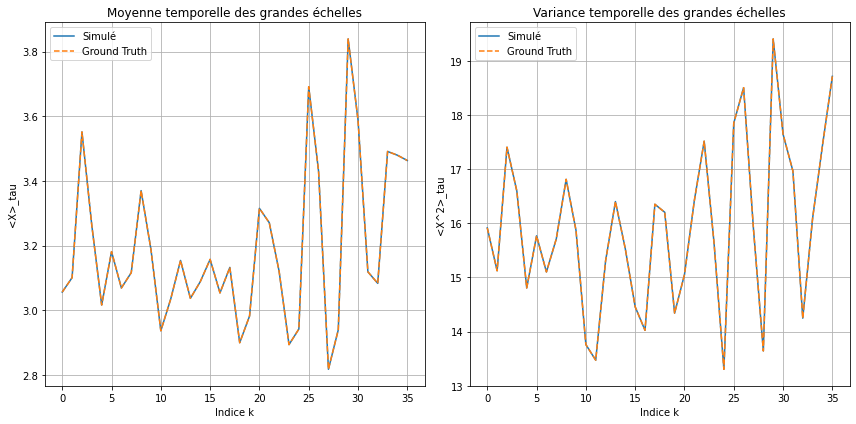

In [167]:
# Visualisation des metrics <X>_tau et <X^2>_tau
plt.figure(figsize=(12, 6))

# Moyenne temporelle des X_k
plt.subplot(121)
plt.plot(metrics_simulated["<X>_tau"], label="Simulé")
plt.plot(metrics_ground_truth["<X>_tau"], label="Ground Truth", linestyle="--")
plt.xlabel("Indice k")
plt.ylabel("<X>_tau")
plt.title("Moyenne temporelle des grandes échelles")
plt.legend()
plt.grid()

# Moyenne temporelle des carrés de X_k
plt.subplot(122)
plt.plot(metrics_simulated["<X^2>_tau"], label="Simulé")
plt.plot(metrics_ground_truth["<X^2>_tau"], label="Ground Truth", linestyle="--")
plt.xlabel("Indice k")
plt.ylabel("<X^2>_tau")
plt.title("Variance temporelle des grandes échelles")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Étape 3 : Identifier les régions plausibles

## 3.1 Explorer les plages de paramètres

- **Objectif :**
  - Explorer les plages de valeurs pour les paramètres \((F, h, b, c)\) autour des valeurs standards.
  




### **Identifier les régions plausibles(`identify_plausible_regions`)**
- **But :** Explorer toutes les combinaisons possibles de paramètres (F, h, b, c) dans leurs plages respectives et vérifier si les trajectoires simulées du système respectent des métriques observées (les métriques "ground truth").
- **Approche :**
  1. Pour chaque combinaison de paramètres, on simule les trajectoires du système.
  2. On calcule les métriques correspondantes aux trajectoires simulées.
  3. On compare les métriques simulées avec les métriques de référence.
  4. Si la différence entre les deux est inférieure à une tolérance (`epsilon`), la configuration est jugée plausible.
- **Sortie :** Une liste de combinaisons de paramètres `(F, h, b, c)` qui respectent les critères définis.

**Application typique :**
- Cela peut être utilisé pour trouver les paramètres d'un modèle physique, climatique ou financier qui reproduisent au mieux les données observées.






In [168]:
def identify_plausible_regions(F_range, h_range, b_range, c_range, X_init, Y_init, metrics_ground_truth, epsilon, si, nt, dt):
    """
    Identifie les régions plausibles dans l'espace des paramètres.

    Args:
        F_range : Plage des valeurs de F.
        h_range : Plage des valeurs de h.
        b_range : Plage des valeurs de b.
        c_range : Plage des valeurs de c.
        X_init : Conditions initiales pour X.
        Y_init : Conditions initiales pour Y.
        metrics_ground_truth : Metrics calculées pour les données "ground truth".
        epsilon : Tolérance pour valider les metrics.
        si : Intervalle d'échantillonnage.
        nt : Nombre d'étapes temporelles.
        dt : Pas de temps.

    Returns:
        plausible_regions : Liste des configurations de paramètres plausibles.
    """
    plausible_regions = []

    # Générer toutes les combinaisons de paramètres
    param_combinations = product(F_range, h_range, b_range, c_range)

    for F, h, b, c in param_combinations:
        # Simuler les trajectoires avec la configuration actuelle
        X, Y, _ = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt)

        # Calculer les metrics pour la configuration actuelle
        metrics_simulated, _ = compute_metrics(X, Y, tau=5, dt=dt)

        # Comparer avec les metrics "ground truth"
        valid = True
        for metric_name, value in metrics_simulated.items():
            diff = np.abs(value - metrics_ground_truth[metric_name])
            if not np.all(diff < epsilon):
                valid = False
                break

        # Si toutes les metrics respectent la tolérance, ajouter la configuration
        if valid:
            plausible_regions.append((F, h, b, c))

    return plausible_regions

**Quantifier l'incertitude (`quantify_uncertainty`)** 
- **But :** Analyser la **variabilité des métriques** dans les régions plausibles identifiées.
- **Approche :**
  1. Pour chaque combinaison plausible de paramètres, on simule les trajectoires et calcule les métriques.
  2. Les métriques de toutes les configurations plausibles sont collectées.
  3. On calcule la moyenne et l'écart-type de chaque métrique pour évaluer la robustesse des résultats.
- **Sortie :** Un dictionnaire contenant :
  - La **moyenne** des métriques.
  - L'**écart-type**, qui indique à quel point les métriques varient dans les configurations plausibles.

**Application typique :**
- Permet de comprendre l'incertitude dans les prédictions du modèle en fonction des paramètres.
- Utile pour évaluer si le système est bien contraint par les métriques définies ou s'il existe une grande variabilité dans les solutions.


In [169]:
def quantify_uncertainty(plausible_regions, X_init, Y_init, si, nt, dt):
    """
    Quantifie l'incertitude en analysant les variations des metrics dans les régions plausibles.

    Args:
        plausible_regions : Liste des configurations de paramètres plausibles.
        X_init : Conditions initiales pour X.
        Y_init : Conditions initiales pour Y.
        si : Intervalle d'échantillonnage.
        nt : Nombre d'étapes temporelles.
        dt : Pas de temps.

    Returns:
        uncertainty : Dictionnaire contenant la moyenne et l'écart-type des metrics.
    """
    all_metrics = {metric: [] for metric in ["<X>_tau", "<Y_bar>_tau", "<X^2>_tau", "<X Y_bar>_tau", "<Y_bar^2>_tau"]}

    for F, h, b, c in plausible_regions:
        # Simuler les trajectoires avec la configuration actuelle
        X, Y, _ = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt)

        # Calculer les metrics pour la configuration actuelle
        metrics_simulated, _ = compute_metrics(X, Y, tau=5, dt=dt)

        # Ajouter les metrics à la liste
        for metric_name, value in metrics_simulated.items():
            all_metrics[metric_name].append(value)

    # Calculer la moyenne et l'écart-type pour chaque metric
    uncertainty = {}
    for metric_name, values in all_metrics.items():
        uncertainty[metric_name] = {
            "mean": np.mean(values, axis=0),
            "std": np.std(values, axis=0)
        }

    return uncertainty

**Définir dynamiquement les plages de paramètres(`define_dynamic_ranges`)**

- **But :** Générer des plages de paramètres ajustées à leur sensibilité, au lieu d'utiliser des plages fixes.
- **Approche :**
  - Si un paramètre a une **sensibilité élevée**, sa plage est définie avec des variations plus fines.
  - Si un paramètre a une **sensibilité faible**, sa plage est plus large pour capturer des variations globales.
- **Sortie :** Une plage de valeurs pour un paramètre donné.

**Application typique :**
- Affiner la recherche des paramètres plausibles en concentrant l'exploration sur les zones critiques.


<!--
 Copyright 2024 ensai
 
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at
 
     https://www.apache.org/licenses/LICENSE-2.0
 
 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.
-->



In [170]:
import numpy as np

def define_dynamic_ranges(value, sensitivity, scale_factor=1.0, num_points=6):
    """
    Définit dynamiquement les plages de paramètres basées sur leur sensibilité.

    Args:
        value (float): Valeur centrale (ground truth).
        sensitivity (str): Niveau de sensibilité du paramètre ("high", "medium", "low").
        scale_factor (float, optional): Facteur d'échelle pour ajuster la largeur des plages. Par défaut 1.0.
        num_points (int, optional): Nombre de points dans la plage. Par défaut 6.

    Returns:
        np.ndarray: Plage de valeurs arrondies.
    
    Raises:
        ValueError: Si la sensibilité spécifiée n'est pas reconnue.
    """
    if sensitivity == "high":
        delta = 0.2 * scale_factor  # Exemple : ±0.2 pour forte sensibilité
    elif sensitivity == "medium":
        delta = 0.1 * scale_factor  # Exemple : ±0.1 pour sensibilité moyenne
    elif sensitivity == "low":
        delta = 1.0 * scale_factor  # Exemple : ±1.0 pour faible sensibilité
    else:
        raise ValueError("Sensibilité non reconnue : choisir 'high', 'medium', ou 'low'.")

    # Générer la plage et arrondir les valeurs
    return np.round(np.linspace(value - delta, value + delta, num_points), decimals=2)


In [171]:


# Définir les plages dynamiquement
F_range = define_dynamic_ranges(F_true, sensitivity="high", scale_factor=1.0, num_points=5)
h_range = define_dynamic_ranges(h_true, sensitivity="medium", scale_factor=1.0, num_points=5)
b_range = define_dynamic_ranges(b_true, sensitivity="low", scale_factor=1.0, num_points=5)
c_range = define_dynamic_ranges(c_true, sensitivity="low", scale_factor=1.0, num_points=5)




In [172]:
print("Plages générées dynamiquement :")
print(f"F : {F_range}")
print(f"h : {h_range}")
print(f"b : {b_range}")
print(f"c : {c_range}")

Plages générées dynamiquement :
F : [ 9.8  9.9 10.  10.1 10.2]
h : [0.9  0.95 1.   1.05 1.1 ]
b : [ 9.   9.5 10.  10.5 11. ]
c : [ 9.   9.5 10.  10.5 11. ]


In [173]:
# Tolérance
epsilon = 0.05  # Autorise une différence maximale de ±0.1

In [174]:
# Identifier les régions plausibles
plausible_regions = identify_plausible_regions(
    F_range, h_range, b_range, c_range,
    X_init, Y_init,
    metrics_ground_truth, epsilon,
    si, nt, dt
)
print(f"Régions plausibles : {plausible_regions}")


Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de points pour tau (5s) : 1000
Nombre de po

In [175]:
print("Régions plausibles identifiées :")
plausible_regions


Régions plausibles identifiées :


[(10.0, 0.9, 9.0, 10.0),
 (10.0, 0.95, 9.5, 10.0),
 (10.0, 1.0, 10.0, 10.0),
 (10.0, 1.05, 10.5, 10.0),
 (10.0, 1.1, 11.0, 10.0)]

In [176]:
print(f"Nombre de régions plausibles trouvées : {len(plausible_regions)}")
print("Voici les combinaisons qui sont bonnes :")
for i, region in enumerate(plausible_regions, 1):
    print(f"{i}. F = {region[0]:.2f}, h = {region[1]:.2f}, b = {region[2]:.2f}, c = {region[3]:.2f}")


Nombre de régions plausibles trouvées : 5
Voici les combinaisons qui sont bonnes :
1. F = 10.00, h = 0.90, b = 9.00, c = 10.00
2. F = 10.00, h = 0.95, b = 9.50, c = 10.00
3. F = 10.00, h = 1.00, b = 10.00, c = 10.00
4. F = 10.00, h = 1.05, b = 10.50, c = 10.00
5. F = 10.00, h = 1.10, b = 11.00, c = 10.00



Définition de num_points :

Le paramètre num_points dans define_dynamic_ranges détermine combien de points sont générés dans chaque plage de paramètres (F_range, h_range, etc.).

Moins de points = espace des paramètres moins dense = moins de combinaisons testées.

Impact sur les régions plausibles :

Si num_points est trop petit, certaines configurations potentiellement plausibles ne sont pas évaluées, ce qui peut entraîner l'absence de régions plausibles.

Augmenter num_points : Essayez avec num_points=5 ou plus pour augmenter la densité de l'espace des paramètres.

Augmenter scale_factor : Si vous utilisez un petit num_points, élargissez la plage des paramètres avec un facteur d'échelle plus grand.

Ajuster epsilon : Une tolérance trop stricte peut exclure des régions qui sont proches de vos métriques de référence.

In [177]:
# Copyright 2024 ensai
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     https://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



In [178]:
"""    # Étape 4 : Quantifier l’incertitude
    if plausible_regions:
        print("\n### Quantification de l’incertitude ###")
        uncertainty = quantify_uncertainty(plausible_regions, X_init, Y_init, si, nt, dt)
        for metric_name, stats in uncertainty.items():
            print(f"{metric_name} : Moyenne = {np.mean(stats['mean']):.3f}, Écart-type = {np.mean(stats['std']):.3f}")
    else:
        print("\nAucune région plausible trouvée. Quantification de l'incertitude impossible.")
"""

'    # Étape 4 : Quantifier l’incertitude\n    if plausible_regions:\n        print("\n### Quantification de l’incertitude ###")\n        uncertainty = quantify_uncertainty(plausible_regions, X_init, Y_init, si, nt, dt)\n        for metric_name, stats in uncertainty.items():\n            print(f"{metric_name} : Moyenne = {np.mean(stats[\'mean\']):.3f}, Écart-type = {np.mean(stats[\'std\']):.3f}")\n    else:\n        print("\nAucune région plausible trouvée. Quantification de l\'incertitude impossible.")\n'

## 3.2 Comparer les métriques simulées et "ground truth"

- **Objectif :**
  - Pour chaque combinaison de paramètres \((F, h, b, c)\), calculer les métriques (moyenne, variance, etc.) des trajectoires simulées.
  - Comparer ces métriques avec les données "ground truth" en utilisant une distance (par exemple, norme).

- **Activité :**
  - Calculer les métriques \((\tau, \tau', < X >, \tau_r, c)\) et comparer les résultats avec un seuil de tolérance \(\epsilon\).



### **1. Comparaison des metrics**
Cette section compare les metrics calculées pour chaque combinaison de paramètres (\(F, h, b, c\)) avec les metrics "ground truth".







1: Comparaison des metrics :

	•	Comparez les metrics calculées pour chaque combinaison de paramètres (F, h, b, c) avec les metrics “ground truth”.

	•	Analysez les écarts pour chaque metric :
	
	•	Une petite différence indique une bonne correspondance avec les observations.
	
	•	Exemple : Si \langle X \rangle_\tau diffère de \langle X \rangle_\text{true} de moins de 5 %, la combinaison est plausible.
	

In [179]:
def compare_and_display_metrics(plausible_regions, metrics_ground_truth, tolerance):
    """
    Compare les metrics pour chaque région plausible avec les metrics ground truth, 
    et affiche les résultats sous un format clair et lisible.

    Args:
        plausible_regions : Liste des régions plausibles (combinaisons de paramètres)
        metrics_ground_truth : Metrics ground truth à comparer
        tolerance : Tolérance pour valider les metrics

    Returns:
        validated_params : Liste des combinaisons de paramètres validées
        comparison_results : Détails des écarts pour chaque metric
    """
    validated_params = []
    comparison_results = []

    print("\n### Résultats de la comparaison des metrics ###")
    print(f"Nombre de régions plausibles analysées : {len(plausible_regions)}\n")

    for i, region in enumerate(plausible_regions):
        F, h, c, b = region

        # Simulation avec la combinaison actuelle de paramètres
        X_Y_sim = integrate_L96_2t(X_init, Y_init, si, nt, F, h, b, c, dt)
        metrics_simulated, _ = compute_metrics(X_Y_sim[0], X_Y_sim[1], tau=5, dt=dt)

        # Comparaison des metrics
        metric_differences = {}
        is_valid = True
        for metric in metrics_ground_truth.keys():
            diff = np.abs(metrics_simulated[metric] - metrics_ground_truth[metric])
            norm_ground_truth = np.abs(metrics_ground_truth[metric])

            if isinstance(diff, np.ndarray):
                relative_diff = diff / norm_ground_truth
                metric_differences[metric] = np.mean(relative_diff)  # Moyenne des écarts pour les arrays
                if not np.all(relative_diff < tolerance):  # Tous les éléments doivent respecter la tolérance
                    is_valid = False
            else:
                relative_diff = diff / norm_ground_truth
                metric_differences[metric] = relative_diff
                if relative_diff >= tolerance:
                    is_valid = False

        # Enregistrer les résultats de la comparaison
        comparison_results.append({
            "params": region,
            "differences": metric_differences,
            "valid": is_valid
        })

        # Affichage des résultats pour cette région
        status = "Valide" if is_valid else "Non valide"
        print(f"Région {i + 1} : F = {F:.2f}, h = {h:.2f}, c = {c:.2f}, b = {b:.2f} ({status})")
        for metric, diff in metric_differences.items():
            print(f"  - Metric {metric}: Écart relatif moyen = {diff:.3%} (Tolérance = {tolerance:.1%})")
        print()

        # Ajouter aux paramètres validés si tous les écarts sont dans la tolérance
        if is_valid:
            validated_params.append(region)

    return validated_params, comparison_results





In [180]:
# Comparaison des metrics avec ground truth
validated_params, comparison_results = compare_and_display_metrics(plausible_regions, metrics_ground_truth, tolerance=0.02)





### Résultats de la comparaison des metrics ###
Nombre de régions plausibles analysées : 5

Nombre de points pour tau (5s) : 1000
Région 1 : F = 10.00, h = 0.90, c = 9.00, b = 10.00 (Non valide)
  - Metric <X>_tau: Écart relatif moyen = 6.513% (Tolérance = 2.0%)
  - Metric <Y_bar>_tau: Écart relatif moyen = 12.394% (Tolérance = 2.0%)
  - Metric <X^2>_tau: Écart relatif moyen = 16.999% (Tolérance = 2.0%)
  - Metric <X Y_bar>_tau: Écart relatif moyen = 16.273% (Tolérance = 2.0%)
  - Metric <Y_bar^2>_tau: Écart relatif moyen = 21.301% (Tolérance = 2.0%)

Nombre de points pour tau (5s) : 1000
Région 2 : F = 10.00, h = 0.95, c = 9.50, b = 10.00 (Non valide)
  - Metric <X>_tau: Écart relatif moyen = 5.715% (Tolérance = 2.0%)
  - Metric <Y_bar>_tau: Écart relatif moyen = 7.183% (Tolérance = 2.0%)
  - Metric <X^2>_tau: Écart relatif moyen = 11.072% (Tolérance = 2.0%)
  - Metric <X Y_bar>_tau: Écart relatif moyen = 12.427% (Tolérance = 2.0%)
  - Metric <Y_bar^2>_tau: Écart relatif moyen = 7.79

In [181]:
def display_comparison_results(comparison_results, tolerance):
    """
    Affiche les résultats de la comparaison des metrics avec ground truth.

    Args:
        comparison_results : Liste des résultats de comparaison (paramètres, différences, validité)
        tolerance : Tolérance utilisée pour valider les metrics
    """
    print("\n### Résultats de la comparaison des metrics ###")
    print(f"Nombre de régions analysées : {len(comparison_results)}\n")

    for i, result in enumerate(comparison_results):
        params = result["params"]
        differences = result["differences"]
        is_valid = result["valid"]
        status = "Valide" if is_valid else "Non Valide"

        print(f"Région {i + 1} : F = {params[0]:.2f}, h = {params[1]:.2f}, c = {params[2]:.2f}, b = {params[3]:.2f} ({status})")
        for metric, diff in differences.items():
            if isinstance(diff, np.ndarray):
                # Affichage des métriques sous forme de tableau (par exemple, moyennes des écarts)
                print(f"  - Metric {metric}: Écart relatif moyen = {np.mean(diff):.3%} (Tolérance = {tolerance:.1%})")
            else:
                # Affichage des métriques scalaires
                print(f"  - Metric {metric}: Écart relatif = {diff:.3%} (Tolérance = {tolerance:.1%})")
        print()  # Ligne vide entre les régions pour une meilleure lisibilité


In [182]:
display_comparison_results(comparison_results, tolerance=0.02)


### Résultats de la comparaison des metrics ###
Nombre de régions analysées : 5

Région 1 : F = 10.00, h = 0.90, c = 9.00, b = 10.00 (Non Valide)
  - Metric <X>_tau: Écart relatif = 6.513% (Tolérance = 2.0%)
  - Metric <Y_bar>_tau: Écart relatif = 12.394% (Tolérance = 2.0%)
  - Metric <X^2>_tau: Écart relatif = 16.999% (Tolérance = 2.0%)
  - Metric <X Y_bar>_tau: Écart relatif = 16.273% (Tolérance = 2.0%)
  - Metric <Y_bar^2>_tau: Écart relatif = 21.301% (Tolérance = 2.0%)

Région 2 : F = 10.00, h = 0.95, c = 9.50, b = 10.00 (Non Valide)
  - Metric <X>_tau: Écart relatif = 5.715% (Tolérance = 2.0%)
  - Metric <Y_bar>_tau: Écart relatif = 7.183% (Tolérance = 2.0%)
  - Metric <X^2>_tau: Écart relatif = 11.072% (Tolérance = 2.0%)
  - Metric <X Y_bar>_tau: Écart relatif = 12.427% (Tolérance = 2.0%)
  - Metric <Y_bar^2>_tau: Écart relatif = 7.791% (Tolérance = 2.0%)

Région 3 : F = 10.00, h = 1.00, c = 10.00, b = 10.00 (Valide)
  - Metric <X>_tau: Écart relatif = 0.000% (Tolérance = 2.0%)


Analyse des écarts :

Si une région est "Valide", cela signifie que toutes les metrics respectent la tolérance.

Si une région est "Non valide", vous pouvez ajuster les plages de paramètres ou la tolérance.

### **3. Analyse de la distance**

Cette section calcule et interprète la distance entre les metrics simulées et "ground truth".




	3.	Analyse de la distance :
	•	Interprétez la distance calculée entre les metrics simulées et “ground truth”.

	
•	Exemple :

	•	Une distance faible (< \epsilon) signifie que les paramètres reproduisent fidèlement les observations.

	•	Une distance élevée indique que la combinaison de paramètres est peu plausible.
	

In [183]:
def analyze_distance(metrics_simulated, metrics_ground_truth):
    """
    Calcule et interprète la distance entre les metrics simulées et ground truth.

    Args:
        metrics_simulated : Metrics simulées pour une configuration donnée
        metrics_ground_truth : Metrics pour les données ground truth

    Returns:
        distances : Dictionnaire des distances pour chaque metric
    """
    distances = {
        metric: np.linalg.norm(metrics_simulated[metric] - metrics_ground_truth[metric]) / np.linalg.norm(metrics_ground_truth[metric])
        for metric in metrics_ground_truth.keys()
    }

    print("\n### Analyse des distances ###")
    for metric, dist in distances.items():
        print(f"Metric {metric}: Distance relative = {dist:.3%}")
    return distances


In [184]:
# Analyse de la distance pour une combinaison plausible
if validated_params:
    X_Y_sim = integrate_L96_2t(X_init, Y_init, si, nt, validated_params[0][0], validated_params[0][1], validated_params[0][2], validated_params[0][3], dt)
    metrics_simulated, _ = compute_metrics(X_Y_sim[0], X_Y_sim[1], tau=5, dt=dt)
    analyze_distance(metrics_simulated, metrics_ground_truth)

# Ajustement des plages de paramètres
F_new_range, h_new_range, b_new_range, c_new_range = adjust_parameter_ranges(
    validated_params, F_range, h_range, b_range, c_range, delta=0.1
)

Nombre de points pour tau (5s) : 1000

### Analyse des distances ###
Metric <X>_tau: Distance relative = 0.000%
Metric <Y_bar>_tau: Distance relative = 0.000%
Metric <X^2>_tau: Distance relative = 0.000%
Metric <X Y_bar>_tau: Distance relative = 0.000%
Metric <Y_bar^2>_tau: Distance relative = 0.000%


NameError: name 'adjust_parameter_ranges' is not defined


### **4. Impact des plages de paramètres**

Cette section ajuste dynamiquement les plages de paramètres en fonction des régions plausibles trouvées.






In [ ]:
def adjust_parameter_ranges(plausible_regions, F_range, h_range, b_range, c_range, delta=0.05):
    """
    Ajuste les plages de paramètres dynamiquement.

    Args:
        plausible_regions : Liste des combinaisons plausibles
        F_range, h_range, b_range, c_range : Plages initiales
        delta : Valeur d'ajustement pour élargir ou réduire les plages

    Returns:
        New ranges for F, h, b, c
    """
    if len(plausible_regions) == 0:
        print("\nAucune région plausible trouvée. Ajustement des plages recommandé.")
        return F_range, h_range, b_range, c_range

    # Extraire les valeurs des régions plausibles
    F_vals = [p[0] for p in plausible_regions]
    h_vals = [p[1] for p in plausible_regions]
    b_vals = [p[2] for p in plausible_regions]
    c_vals = [p[3] for p in plausible_regions]

    # Ajuster les plages
    F_new_range = np.linspace(min(F_vals) - delta, max(F_vals) + delta, len(F_range))
    h_new_range = np.linspace(min(h_vals) - delta, max(h_vals) + delta, len(h_range))
    b_new_range = np.linspace(min(b_vals) - delta, max(b_vals) + delta, len(b_range))
    c_new_range = np.linspace(min(c_vals) - delta, max(c_vals) + delta, len(c_range))

    print("\n### Nouveaux intervalles de paramètres ###")
    print(f"F : {F_new_range}")
    print(f"h : {h_new_range}")
    print(f"b : {b_new_range}")
    print(f"c : {c_new_range}")

    return F_new_range, h_new_range, b_new_range, c_new_range

### **Résumé**

1. **Comparaison des metrics :**
   - Comparez les metrics des simulations avec les metrics "ground truth".
   - Identifiez les combinaisons de paramètres plausibles.

2. **Visualisation des régions plausibles :**
   - Tracez des graphiques pour comprendre où se situent les paramètres valides.

3. **Analyse de la distance :**
   - Évaluez si les metrics des simulations sont proches des metrics "ground truth".

4. **Impact des plages de paramètres :**
   - Ajustez dynamiquement les plages pour améliorer l'exploration des paramètres.



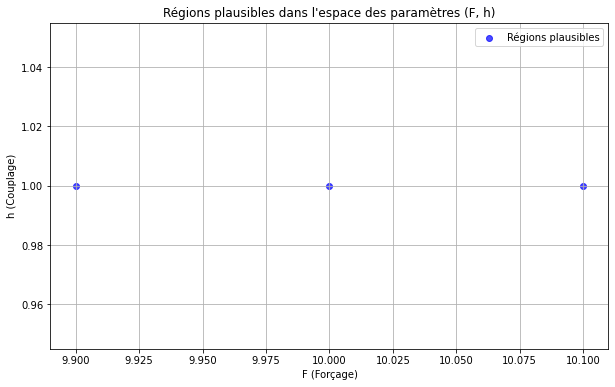

In [ ]:
# Visualisation des régions plausibles
visualize_plausible_regions(plausible_regions)


In [ ]:
# Analyse de la distance
if len(plausible_regions) > 0:
    X_Y_sim = integrate_L96_2t(X_init, Y_init, si, nt, plausible_regions[0][0], plausible_regions[0][1], plausible_regions[0][2], plausible_regions[0][3], dt)
    metrics_simulated, _ = compute_metrics(X_Y_sim[0], X_Y_sim[1], tau=5, dt=dt)
    analyze_distance(metrics_simulated, metrics_ground_truth)

# Ajustement des plages si nécessaire
F_new_range, h_new_range, b_new_range, c_new_range = adjust_parameter_ranges(
    plausible_regions, F_range, h_range, b_range, c_range, tolerance=0.05
)

Nombre de points pour tau (5s) : 1000

### Analyse des distances ###
Metric <X>_tau: Distance = 0.006 (Acceptable)
Metric <Y_bar>_tau: Distance = 0.006 (Acceptable)
Metric <X^2>_tau: Distance = 0.015 (Acceptable)
Metric <X Y_bar>_tau: Distance = 0.012 (Acceptable)
Metric <Y_bar^2>_tau: Distance = 0.005 (Acceptable)

### Nouveaux intervalles de paramètres ###
F : [ 9.85   9.925 10.    10.075 10.15 ]
h : [0.95  0.975 1.    1.025 1.05 ]
b : [ 9.95   9.975 10.    10.025 10.05 ]
c : [ 9.95   9.975 10.    10.025 10.05 ]
